
For K = 90
--------------------------------------------
Asian Call Option Price: 	 10.919490131218717
Variance in Asian Call Option Price:  16.65452147015327
--------------------------------------------
--------------------------------------------
Asian Put Option Price: 	 0.29678331595963625
Variance in Asian Put Option Price:  0.8432322247458635
--------------------------------------------

For K = 105
--------------------------------------------
Asian Call Option Price: 	 1.4786831263414608
Variance in Asian Call Option Price:  4.114827517182623
--------------------------------------------
--------------------------------------------
Asian Put Option Price: 	 6.042979542787555
Variance in Asian Put Option Price:  10.934454182608489
--------------------------------------------

For K = 110
--------------------------------------------
Asian Call Option Price: 	 0.6159957221749606
Variance in Asian Call Option Price:  2.221694886464351
--------------------------------------------
----

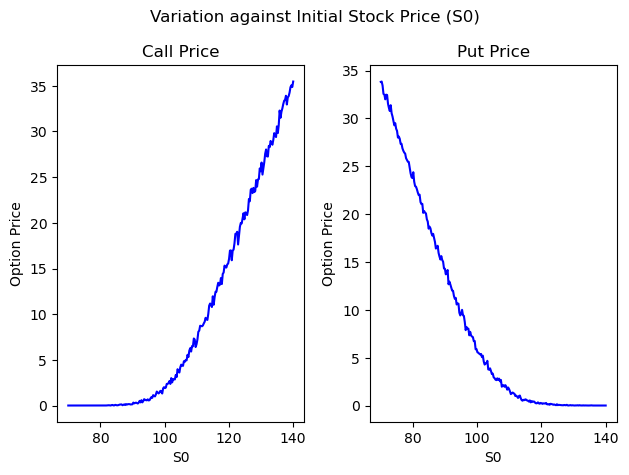

/tmp/ipykernel_5602/2735434404.py:27: RuntimeWarning: invalid value encountered in scalar divide
  b = num / denom


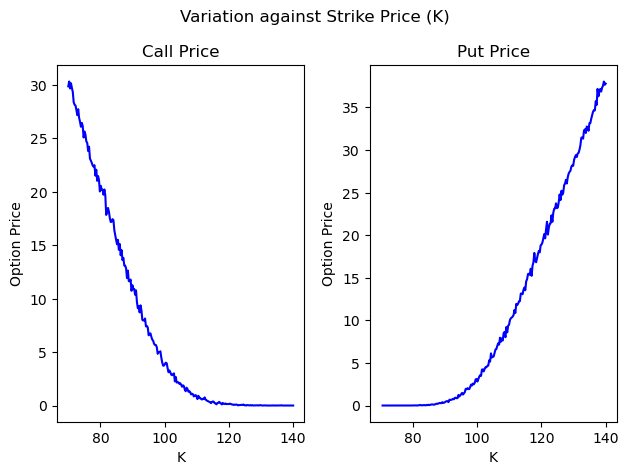

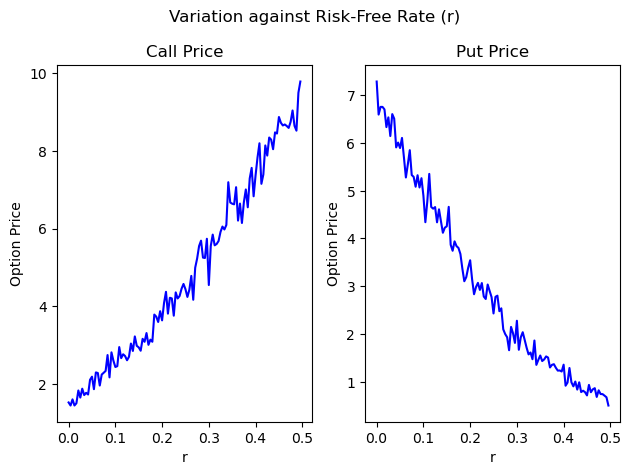

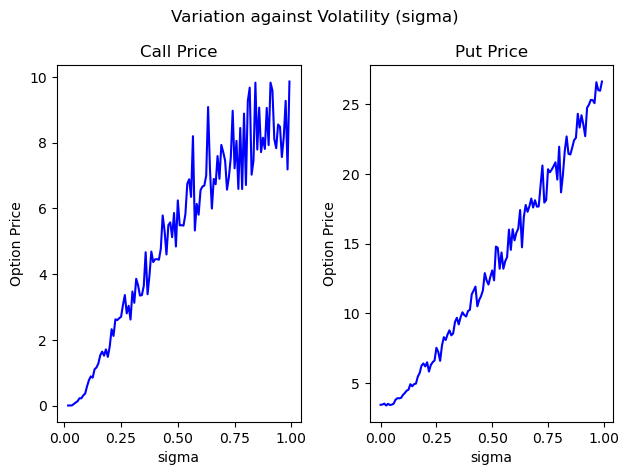

([nan,
  nan,
  0.0,
  0.001047962893687649,
  0.0035474492975203394,
  0.04506848920394653,
  0.0904262921994754,
  0.13014985925372258,
  0.2199385706318302,
  0.219617363884038,
  0.3065170214584912,
  0.3624018504864755,
  0.5796318720734636,
  0.7682846641841573,
  0.8863752376858999,
  0.8482658346295029,
  1.1026650497204373,
  1.1572330271677316,
  1.2796490843739308,
  1.52989322777057,
  1.6404937128464794,
  1.5170042183651096,
  1.7082116437299313,
  1.4791803107810406,
  1.7909000895737148,
  2.321344722061941,
  2.1168165237895535,
  2.623072013974021,
  2.5988179430249696,
  2.656082245062242,
  2.6970631869511403,
  3.0590736793744724,
  3.3601594145598694,
  2.802563431949404,
  3.0333710139752266,
  2.615695813680587,
  3.467651278855273,
  3.124787993124655,
  3.855729886631137,
  3.6545274470941527,
  3.3447196925868257,
  3.356504972800571,
  3.6366994764561875,
  4.662345527024065,
  3.385584239691425,
  3.945516108828196,
  4.683520729337444,
  4.364204407889485,

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

np.random.seed(42)


def generate_stock_prices(S_0, mu, sigma, n):
    dt = 1.0 / 252
    W_t = np.random.randn(n)
    prices = []
    for _ in range(n):
        S_t = S_0 * math.exp((mu - sigma**2) * dt + sigma * math.sqrt(dt) * W_t[_])
        prices.append(S_t)
        S_0 = S_t
    return prices

def variance_reduction(option_payoff, control_variate, r, n, dt):
    X_bar = np.mean(control_variate)
    Y_bar = np.mean(option_payoff)
    max_iter = len(option_payoff)
    num, denom = 0, 0
    for idx in range(max_iter):
        num += (control_variate[idx] - X_bar) * (option_payoff[idx] - Y_bar)
        denom += (control_variate[idx] - X_bar) ** 2
    b = num / denom
    reduced_variate = []
    for idx in range(max_iter):
        reduced_variate.append((option_payoff[idx] - b * (control_variate[idx] - X_bar)))
    return reduced_variate

def asian_option_price(S_0, r, sigma, K, max_iter=1000, path_length=126, n=126):
    dt = 1 / 252
    call_option_payoff, put_option_payoff = [], []
    control_variate_call, control_variate_put = [], []

    for _ in range(max_iter):
        S = generate_stock_prices(S_0, r, sigma, path_length)
        V_call = max(np.mean(S) - K, 0)
        V_put = max(K - np.mean(S), 0)

        call_option_payoff.append(math.exp(-r * n * dt) * V_call)
        put_option_payoff.append(math.exp(-r * n * dt) * V_put)

        control_variate_call.append(math.exp(-r * n * dt) * max(S[-1] - K, 0))
        control_variate_put.append(math.exp(-r * n * dt) * max(K - S[-1], 0))

    call_option_payoff = variance_reduction(call_option_payoff, control_variate_call, r, n, dt)
    put_option_payoff = variance_reduction(put_option_payoff, control_variate_put, r, n, dt)

    return np.mean(call_option_payoff), np.mean(put_option_payoff), np.var(call_option_payoff), np.var(put_option_payoff)

def visualize_variation_with_S0(r, sigma, K):
    S0 = np.linspace(70, 140, num=250)
    call, put = [], []

    for i in S0:
        call_price, put_price, _, _ = asian_option_price(i, r, sigma, K, 500, 150, 100)
        call.append(call_price)
        put.append(put_price)
  
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(S0, call, color='blue')
    axes[0].set_title('Call Price') 
    axes[1].plot(S0, put, color='blue')
    axes[1].set_title('Put Price') 
    plt.suptitle("Variation against Initial Stock Price (S0)")
    axes[0].set_xlabel('S0')
    axes[0].set_ylabel('Option Price')
    axes[1].set_xlabel('S0')
    axes[1].set_ylabel('Option Price')
    plt.tight_layout()
    plt.show()

    return call, put

def visualize_variation_with_K(S0, r, sigma):
    K = np.linspace(70, 140, num=250)
    call, put = [], []

    for i in K:
        call_price, put_price, _, _ = asian_option_price(S0, r, sigma, i, 500, 150, 100)
        call.append(call_price)
        put.append(put_price)
  
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(K, call, color='blue')
    axes[0].set_title('Call Price') 
    axes[1].plot(K, put, color='blue')
    axes[1].set_title('Put Price') 
    plt.suptitle("Variation against Strike Price (K)")
    axes[0].set_xlabel('K')
    axes[0].set_ylabel('Option Price')
    axes[1].set_xlabel('K')
    axes[1].set_ylabel('Option Price')
    plt.tight_layout()
    plt.show()

    return call, put

def visualize_variation_with_r(S0, sigma, K):
    r = np.linspace(0, 0.5, num=120, endpoint=False)
    call, put = [], []

    for i in r:
        call_price, put_price, _, _ = asian_option_price(S0, i, sigma, K, 500, 150, 100)
        call.append(call_price)
        put.append(put_price)
  
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(r, call, color='blue')
    axes[0].set_title('Call Price') 
    axes[1].plot(r, put, color='blue')
    axes[1].set_title('Put Price') 
    plt.suptitle("Variation against Risk-Free Rate (r)")
    axes[0].set_xlabel('r')
    axes[0].set_ylabel('Option Price')
    axes[1].set_xlabel('r')
    axes[1].set_ylabel('Option Price')
    plt.tight_layout()
    plt.show()

    return call, put

def visualize_variation_with_sigma(S0, r, K):
    sigma = np.linspace(0, 1, num=120, endpoint=False)
    call, put = [], []

    for i in sigma:
        call_price, put_price, _, _ = asian_option_price(S0, r, i, K, 500, 150, 100)
        call.append(call_price)
        put.append(put_price)
  
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(sigma, call, color='blue')
    axes[0].set_title('Call Price') 
    axes[1].plot(sigma, put, color='blue')
    axes[1].set_title('Put Price') 
    plt.suptitle("Variation against Volatility (sigma)")
    axes[0].set_xlabel('sigma')
    axes[0].set_ylabel('Option Price')
    axes[1].set_xlabel('sigma')
    axes[1].set_ylabel('Option Price')
    plt.tight_layout()
    plt.show()

    return call, put

for K in [90, 105, 110]:
    call_price, put_price, call_var, put_var = asian_option_price(100, 0.05, 0.2, K)
    print(f"\nFor K = {K}")
    print("--------------------------------------------")
    print("Asian Call Option Price: \t", call_price)
    print("Variance in Asian Call Option Price: ", call_var)
    print("--------------------------------------------")
    print("--------------------------------------------")
    print("Asian Put Option Price: \t", put_price)
    print("Variance in Asian Put Option Price: ", put_var)
    print("--------------------------------------------")

visualize_variation_with_S0(0.05, 0.2, 105)
visualize_variation_with_K(100, 0.05, 0.2)
visualize_variation_with_r(100, 0.2, 105)
visualize_variation_with_sigma(100, 0.05, 105)